# Predicting Auction Price of Bulldozer

## 1. Problem Statement

Our objective is to predict the sales price of bull dozer at an auction given the features of bulldozers and the price for which similar bulldozers were previously sold for.


## 2. Data

The dataset used is from a kaggle competition and can be downloaded from the following url:
    https://www.kaggle.com/c/bluebook-for-bulldozers/data

### More about the data and competition.

For this competition, you are predicting the sale price of bulldozers sold at auctions.

The data for this competition is split into three parts:

Train.csv is the training set, which contains data through the end of 2011.

Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

SalesID: the unique identifier of the sale

MachineID: the unique identifier of a machine.  A machine can be sold multiple times

saleprice: what the machine sold for at auction (only provided in train.csv)

saledate: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.

The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more details:  https://www.kaggle.com/c/bluebook-for-bulldozers/data

## 4. Features

To learn about each features in detail you can have a look at the data dictionary provided by kaggle here : https://docs.google.com/spreadsheets/d/1DQRBZa62gUM6oDUlM9xJEIvO8Ml4Qcyz/edit#gid=380001012

### Setting up Environment

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

**Importing TrainandCV data**

In [2]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory = False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

Let's now look at some information of different features 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

**Checking the status for missing and null values**

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Let's look at two features in particular and plot them : Saledate and SalePrice.

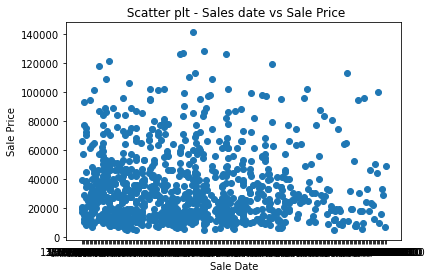

In [6]:
plt.scatter (df["saledate"][:1000], df["SalePrice"][:1000]) # only looking at 1000 rows
plt.xlabel("Sale Date")
plt.ylabel("Sale Price")
plt.title(" Scatter plt - Sales date vs Sale Price")
plt.show()


We can observe that the saledate lables are overlapped due to the way the dates are formatted.

Let's have a look at histogram and see the frequency distribution of sale prices.

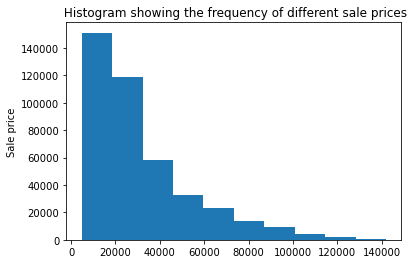

In [7]:
df.SalePrice.plot.hist()
plt.ylabel("Sale price")
plt.title(" Histogram showing the frequency of different sale prices")
plt.show()

We can observe that expensive sale prices are less frequent.

We will now look at format of saledate that we currently have.


In [8]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

**Note** : When we work with time series data, we want to enrich the time and date component as much as possible,
    
We can do that by specifying which of our columns has date in it using the 'parse_dates' parameter while importing dataset using pandas library.

**We will now again load the data by parsing dates**

In [9]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory = False, parse_dates=["saledate"])

Now let's look at the saledate column and see it's format.

In [10]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

The formatting has changed and the dateype is datetime64 as well.

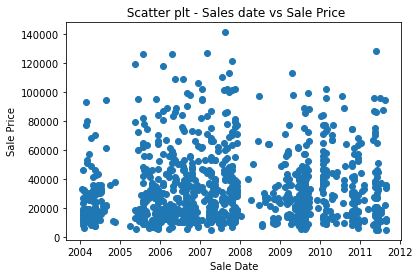

In [11]:
plt.scatter (df["saledate"][:1000], df["SalePrice"][:1000]) # only looking at 1000 rows
plt.xlabel("Sale Date")
plt.ylabel("Sale Price")
plt.title(" Scatter plt - Sales date vs Sale Price")
plt.show()

We can observe some gap or less sales during the years 2005 and 2008. Also, the highest sales price was in 2008.
Remember, this is just looking at 1000 samples

Let's look at all the features by transposing the df.

In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

We can notice that the dataframe is not sorted as per date, but as we are dealing with dates here, we might want to sort the dataframe in chronological order of dates.

#### Sorting the dataframe by saledate

In [14]:
df.sort_values(by=["saledate"], inplace = True, ascending = True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

Let's make a copy of the original data frame for future use.

In [15]:
df_temp = df.copy()

In [16]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Feature Engineering

**Creating some new features based on saledate column.**

In [17]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayofWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayofYear"] = df_temp.saledate.dt.dayofyear

Looking at newly created features.

In [18]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


Let's remove the `saledate` feature now that we have all the information from it in newly created features.

In [19]:
df_temp.drop("saledate", axis = 1, inplace = True)

In [20]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


Let's look at the sales number by different states.

In [21]:
df_temp.state.value_counts().head()

Florida       67320
Texas         53110
California    29761
Washington    16222
Georgia       14633
Name: state, dtype: int64

**We can always have a look at all the features, but let's try to filter th features by doing some initial modelling follwed by some EDA. But before that we need to take care of non-numerical value and null values**

**Converting strings to Categories**

In [22]:
#Checking if a feature is of certain type. -> here, string
#Ref : https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/general_utility_functions.html#data-types-related-functionality
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [23]:
#Finding columns which contain strings.
for features, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(features)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
#Converting strings into category values
for features, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[features] = content.astype("category").cat.as_ordered()

In [25]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [26]:
# Looking at categories of state.

In [27]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
# looking under the hood how the categories os states are encoded.
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

By converting strings to categories, we can now have a way to access all of our data in the form of numbers.

Now, let's shift our attention to handle missing values

In [29]:
# Looking at what proportion of missing values are present in each feature.
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

**Saving the pre-processed data to a new file. Just for future reference.**

In [30]:
# Exporting dataframe
df_temp.to_csv("data/train_temp.csv", index = False)

In [31]:
#Importing pre-processed data
df_temp = pd.read_csv("data/train_temp.csv", low_memory = False)

In [32]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


**Now, we will handle missing values**

### Filling Missing Values

### Filling Numeric Missing Values

In [33]:
#printing numerical features 
for feature, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
            print(feature)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [34]:
# Checking which numeric features have null values
for feature, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        # if any one value is missing
         if pd.isnull(content).sum():
            print(feature)

auctioneerID
MachineHoursCurrentMeter


In [35]:
# Checking which numeric features have null values
for feature, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
         if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
            df_temp[feature+"_is_missing"] = pd.isnull(content) # will tell us that though we filled the missing value, it was missig at first.
            # Fill missing numerical values median
            df_temp[feature] = content.fillna(content.median())

Now that we have filled numeric data type null values, we will check if it worked well.

In [36]:
# Check if there  is any null numeric values
for feature, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(feature)

We can see that there is no such numeric features with null values as all the values are filled.

In [37]:
# Checking to see how many values were missing and that we filled.
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

We have filled 20136 missing values in the column `auctioneerID`

Let's look at some other features that still have missing value.

In [38]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variable 

In [39]:
# Checking for columns which aren't numeric
for feature, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(feature)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Looking at categories of state features

In [40]:
pd.Categorical(df_temp["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
                 ordered=False)

In [41]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [42]:
# Turn categorical variables into numbers and fill missing
for feature, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding binary column to indicate whether sample had missing value
        df_temp[feature+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[feature] = pd.Categorical(content).codes +1 # adding "1" as pandas returns -1 for any missing value that is present
        # we want our numerical coding to start from 0 itself and not from -1
        

In [43]:
# example showing what's happening under the hood.
pd.Categorical(df_temp["state"]).codes +1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [44]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

We can observe that now there are no missing values as such.

In [45]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


Now, we have no missing values and all features are now numeric, thus, we can build a ML model on top of it.

**Notes**

time is a magic command. It's a part of IPython.

%%time prints the wall time for the entire cell whereas %time gives you the time for first line only

Using %%time or %time prints 2 values:

i) CPU Times

ii) Wall Time

In [46]:
%%time 
from sklearn.ensemble import RandomForestRegressor
# Instantiating the model
model = RandomForestRegressor(n_jobs = -1, random_state = 42) #sklearn has no gpu suuport so need too use all cpu core.

# Fit the model
model.fit(df_temp.drop("SalePrice" , axis = 1), df_temp["SalePrice"])

Wall time: 2min 12s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [47]:
# Scoring the model, by defaul returns the R^2 values.
model.score(df_temp.drop("SalePrice", axis =1), df_temp["SalePrice"])

0.9875468079970562

The score is good.However, the above score is on training data only. We have not tested it against test data. Furthermore, the evalaution metric for our competition is RMSLE (Root Mean Square Log Error)

### Evaluating the machine learning model

For this we will split the dataset into training and test set.

#### Splitting data into train/validation sets

As our data is a time-series data, it would be better that we split the train and  test set chronologically (by time).


In [48]:
df_temp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [49]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

Any data that is in year 2012, we want to seggregate it into validation set and any data before that will be training set.


In [50]:
#Splitting into training and validation
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]
len(df_val), len(df_train)

(11573, 401125)

In [51]:
## Splitting data into X (features) ad y (labels)
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val.SalePrice

#Checking shapes to ensure everything is alright
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

Looking at some training labels -> SalePrice Feature

In [52]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [53]:
# Creating RMSLE evaluation function
# We use RMSLE as it penalizes the loss less, as the prices in our cases are on the higher side. 
# we would want to tone down th error as discrepancy can be large but won't matter as much.
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Creating a  fucntion to evaluate model on a different sets of data
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict (X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

### Fitting model on default hyperparameters

In [54]:
%%time
# We can reduce the size of the model by changing max_sample value
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42)
model.fit(X_train, y_train)

Wall time: 2min 10s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [55]:
show_scores(model)

{'Training MAE': 1578.2015208725463,
 'Valid MAE': 6120.959637950402,
 'Training RMSLE': 0.08426351714047395,
 'Valid RMSLE': 0.25557446689440955,
 'Training R^2': 0.9875150955953674,
 'Valid R^2': 0.8727175969771312}

### Hyperparameter Tuning using RandomizedSearchCV

In [86]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#different values for attributes used in RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10,100,5),
          "max_depth": [None, 3, 5, 7, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"]}

#Instantiating RandomizedSearchCV Model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs= -1, random_state = 42),
                                                   param_distributions = rf_grid,
                                                   n_iter = 100,
                                                   cv = 5,
                                                   verbose = True )

#Fit the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 136.7min finished


Wall time: 2h 17min 11s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   verbose=True)

In [87]:
#### Finding th best model hyperparameters
rs_model.best_params_

{'n_estimators': 45,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': None}

In [88]:
show_scores(rs_model)

{'Training MAE': 3022.627283023171,
 'Valid MAE': 5942.588414825853,
 'Training RMSLE': 0.14985443055045825,
 'Valid RMSLE': 0.24424005711086266,
 'Training R^2': 0.9549726000875904,
 'Valid R^2': 0.8812169478510609}

### Train the model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`

In [89]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 45,
                                   min_samples_leaf = 3,
                                   min_samples_split = 12,
                                   max_features = 0.5,
                                   n_jobs = -1,
                                   max_samples = None,
                                   random_state = 42)

#Fitting the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 32 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=12, n_estimators=45, n_jobs=-1,
                      random_state=42)

In [90]:
show_scores(ideal_model)

{'Training MAE': 3022.62728302317,
 'Valid MAE': 5942.588414825851,
 'Training RMSLE': 0.14985443055045825,
 'Valid RMSLE': 0.24424005711086266,
 'Training R^2': 0.9549726000875904,
 'Valid R^2': 0.8812169478510609}

### Making predictions on test data

In [92]:
# Importing test data
df_test = pd.read_csv("data/Test.csv", low_memory = False, parse_dates = ["saledate"])

In [93]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Pre-Processing test set

We need to convert the test set in the same format that our train dataset is in.

In [94]:
# Let's define a function that will perform pre-processing.


def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [95]:
# Processing the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


Still we have one column short than the training set.

In [96]:
#We can see what columns are different in to dataset, we can try the following.
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing', 'saleDayofWeek', 'saleDayofYear'}

In [97]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [98]:
# Manually adjusr df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [99]:
# Making predictions on the test dataset
test_preds = ideal_model.predict(df_test)

In [100]:
test_preds

array([20161.80456378, 17926.03334937, 48541.21309065, ...,
       13410.09956787, 18262.81810081, 27220.17034618])

#### Formatting the predictions into the same format asked by Kaggle

In [101]:
# Formatting the predictions into the same format asked by Kaggle
df_preds = pd.DataFrame() # creating empty column
df_preds["SalesId"]  = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesId,SalesPrice
0,1227829,20161.804564
1,1227844,17926.033349
2,1227847,48541.213091
3,1227848,65126.856415
4,1227863,43740.915082
...,...,...
12452,6643171,47698.144908
12453,6643173,13846.995322
12454,6643184,13410.099568
12455,6643186,18262.818101


#### Exporting prediction data to a csv file.

In [102]:
df_preds.to_csv("data/test_predictions.csv", index = False) # "index = False" avoids indexing of the dataframe

### Feature Importance 

Identifying the features data that were more responsible for predicting the target variable.

In [103]:
ideal_model.feature_importances_

array([3.45092243e-02, 1.83098123e-02, 4.14952319e-02, 1.75994239e-03,
       3.15804530e-03, 2.10354930e-01, 2.92947553e-03, 1.00081052e-03,
       4.52219756e-02, 4.66974992e-02, 6.68389848e-02, 4.76416923e-03,
       1.53304849e-02, 1.57024708e-01, 4.32759805e-02, 5.76362222e-03,
       2.78419021e-03, 3.53885721e-03, 2.77632960e-03, 5.51057691e-02,
       4.27344459e-04, 3.97999226e-05, 8.36465050e-04, 2.35778673e-04,
       8.16011043e-04, 1.28318079e-05, 1.90797390e-03, 4.18565823e-03,
       2.26011985e-03, 1.83214918e-03, 4.07171103e-03, 1.71955400e-03,
       5.17224176e-03, 1.15294471e-03, 1.96030274e-04, 6.34378582e-03,
       7.80174322e-04, 1.08430276e-02, 1.44409977e-03, 3.52036388e-03,
       1.22258219e-03, 8.90439665e-04, 1.49365838e-03, 6.12665326e-04,
       6.30843653e-04, 3.11578914e-04, 3.38117472e-04, 2.31215936e-03,
       1.40458225e-03, 2.04020514e-04, 2.48687442e-04, 7.34206597e-02,
       3.89339008e-03, 5.52571520e-03, 2.80702010e-03, 9.72736606e-03,
      

In [104]:
len(ideal_model.feature_importances_)

102

We basically got all values for each feature.

In [105]:
# Creating a function that will plot feature importance.
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
         .reset_index(drop = True))
    
    #Plotting the daraframe
    plt.barh(df["features"][:n], df["feature_importances"][:20])
    plt.ylabel("Features")
    plt.xlabel("Feature Importance")
    plt.title("Horizontal Bar graph showing the most important features")
    plt.gca().invert_yaxis()
    

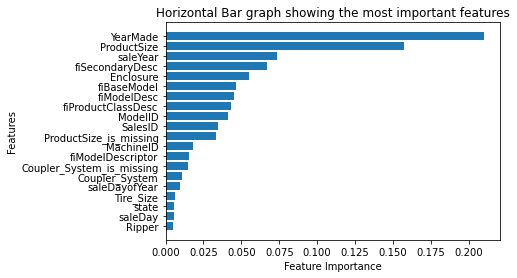

In [106]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Observation**

We can observe that the most important feature determining price is the year in whoich the bull dozer was made.

The test set results are not provided in the kaggle dataset. However, RMSLE on our validation set is 0.2442, which is pretty good.